In [24]:
import pandas as pd
import os
from PIL import Image

In [2]:
df_knn = pd.read_csv('knn_results.csv')

In [5]:
df_query_meta = pd.read_csv('test_submit_dataset/prompts.csv')

In [6]:
df_doc_meta = pd.read_csv('index.csv')

In [25]:
df_knn

,query_id,doc_ids,distances
0,0,"[2811355, 2414492, 2644209, 2644212, 2784640]","[22405113856.0, 22602422272.0, 22602422272.0, ..."
1,1,"[2640528, 2811355, 2560037, 1227093, 2414495]","[25186803712.0, 26413279232.0, 26462074880.0, ..."
2,2,"[2811355, 2640528, 2414492, 2784639, 1908331]","[24853618688.0, 25132969984.0, 25195765760.0, ..."
3,3,"[2640528, 2811355, 2414492, 2644211, 2644230]","[25622929408.0, 26366068736.0, 26773997568.0, ..."
4,4,"[2640528, 2811355, 2414492, 1909999, 2784637]","[22324129792.0, 22604978176.0, 22610065408.0, ..."
5,5,"[2811355, 2640528, 2414492, 2009142, 2560036]","[25257893888.0, 25440962560.0, 25476386816.0, ..."
6,6,"[2640528, 2414492, 2120703, 2009142, 2978759]","[23502473216.0, 24307363840.0, 24307363840.0, ..."


In [29]:
index = 31009
img_path = os.path.join('/mnt/home/data/diffusiondb_img', df_doc_meta.iloc[index,:].part, df_doc_meta.iloc[index,:].img_name)
img = Image.open(img_path)

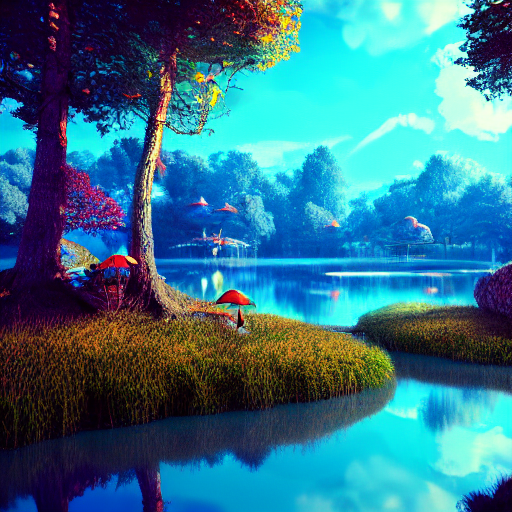

In [30]:
img

In [1]:
import faiss
import numpy as np

In [2]:
xb = np.random.rand(10000, 128).astype('float16')

In [3]:
xq = np.random.rand(1, 128).astype('float16')

In [4]:
d = 128  # original dim
m = 16  # new dim
nbits = 8  # 256 centroids per subspace
index = faiss.IndexPQ(d, m, nbits)  

In [6]:
index.train(xb)

In [7]:
index.add(xb)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Loading model...')
print('Device:', device)
config = load_config(args.model_config_path, display=False)
model = load_vqgan(config, ckpt_path=args.model_ckpt_path).to(device)